# MODELO SEIR

O modelo SEIR (Susceptible, Exposed, Infected, Recovered) é um modelo que leva em conta o tempo de incubação do vírus, ou seja, o tempo em que os indivíduos foram contaminados, porém ainda não espalham a doença. 

O modelo SEIR pode ser descrito pelo sistema de equações:

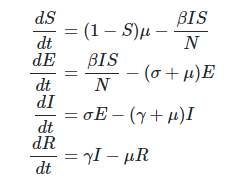

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode, solve_ivp

In [10]:
def seir_ode(t, init, params):
    
    p, n, μ, σ, γ  = params
    β = p*n
    
    S, E, I, R = init
    N = S+E+I+R
    
    # ODEs
    
    dS = (1-S)*μ - (β*I*S)/N
    dE = (β*I*S)/N - (σ + μ)*E
    dI = σ*E - (γ+μ)*I
    dR = γ*I - μ*R
    
    return [dS, dE, dI, dR]

def calculate_r0(params):
    
    p, n, μ, σ, γ  = params
    
    β = p*n
    
    return (σ/(σ+μ))*(β/(γ+μ))

Com a probabilidade de infecção em 5.0% e com o indivíduos encontrando em média outros 20, o R0 é 6.99


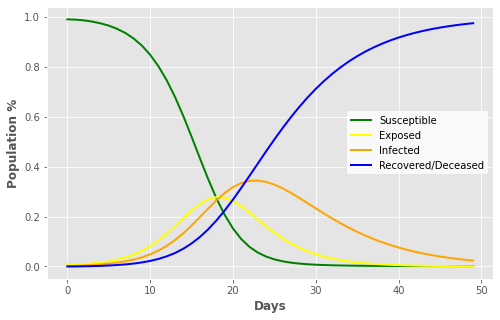

In [14]:
params = [0.05, 20, 0.000028, 0.25, 0.143]
init = [0.99,0.01,0,0]
ndays = 50

r0 = "{:.02f}".format(calculate_r0(params))

print(f'Com a probabilidade de infecção em {params[0]*100}% e com os indivíduos encontrando em média outros {params[1]}, o R0 é {r0}')

sir_sol = solve_ivp(fun=lambda t, y: seir_ode(t, y, params), t_span=[0, ndays], y0=init, t_eval=np.arange(0, ndays, 1))
sir_out = pd.DataFrame({"t":sir_sol["t"],
                        "S":sir_sol["y"][0],
                        "E":sir_sol["y"][1],
                        "I":sir_sol["y"][2], 
                        "R":sir_sol["y"][3]})

sir_out.columns=["t", "Susceptible", "Exposed", "Infected", "Recovered/Deceased"]

plt.style.use("ggplot")
plt.figure(figsize=(8,5))
sline = plt.plot("t","Susceptible","",data=sir_out,color="green",linewidth=2)
eline = plt.plot("t","Exposed","",data=sir_out,color="yellow",linewidth=2)
iline = plt.plot("t","Infected","",data=sir_out,color="orange",linewidth=2)
rline = plt.plot("t","Recovered/Deceased","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Days",fontweight="bold")
plt.ylabel("Population %",fontweight="bold")
legend = plt.legend(title="",loc=5,bbox_to_anchor=(1,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)

Com a probabilidade de infecção em 5.0% e com o indivíduos encontrando em média outros 10, o R0 é 3.50


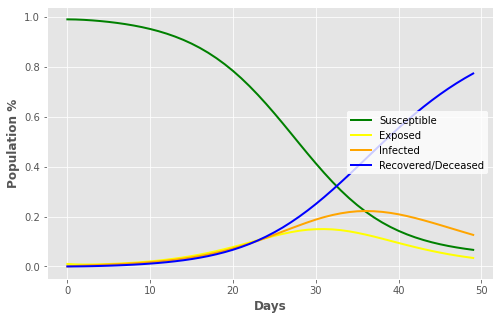

In [15]:
params = [0.05, 10, 0.000028, 0.25, 0.143]
init = [0.99,0.01,0,0]
ndays = 50

r0 = "{:.02f}".format(calculate_r0(params))

print(f'Com a probabilidade de infecção em {params[0]*100}% e com os indivíduos encontrando em média outros {params[1]}, o R0 é {r0}')

sir_sol = solve_ivp(fun=lambda t, y: seir_ode(t, y, params), t_span=[0, ndays], y0=init, t_eval=np.arange(0, ndays, 1))
sir_out = pd.DataFrame({"t":sir_sol["t"],
                        "S":sir_sol["y"][0],
                        "E":sir_sol["y"][1],
                        "I":sir_sol["y"][2], 
                        "R":sir_sol["y"][3]})

sir_out.columns=["t", "Susceptible", "Exposed", "Infected", "Recovered/Deceased"]

plt.style.use("ggplot")
plt.figure(figsize=(8,5))
sline = plt.plot("t","Susceptible","",data=sir_out,color="green",linewidth=2)
eline = plt.plot("t","Exposed","",data=sir_out,color="yellow",linewidth=2)
iline = plt.plot("t","Infected","",data=sir_out,color="orange",linewidth=2)
rline = plt.plot("t","Recovered/Deceased","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Days",fontweight="bold")
plt.ylabel("Population %",fontweight="bold")
legend = plt.legend(title="",loc=5,bbox_to_anchor=(1,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)